# The bike rides dataset

In this notebook, we will present the "Bike Ride" dataset. This dataset is
located in the directory `datasets` in a comma separated values (CSV) format.

We open this dataset using pandas.

In [1]:
import pandas as pd

cycling = pd.read_csv("../datasets/bike_rides.csv")
cycling.head()

,timestamp,power,heart-rate,cadence,speed,acceleration,slope
0,2020-08-18 14:43:19,150.0,102.0,64.0,4.325,0.0880,-0.033870
1,2020-08-18 14:43:20,161.0,103.0,64.0,4.336,0.0842,-0.033571
2,2020-08-18 14:43:21,163.0,105.0,66.0,4.409,0.0234,-0.033223
3,2020-08-18 14:43:22,156.0,106.0,66.0,4.445,0.0016,-0.032908
4,2020-08-18 14:43:23,148.0,106.0,67.0,4.441,0.1144,0.000000


The first column `timestamp` contains a specific information regarding the the
time and date of a record while other columns contain numerical value of some
specific measurements. Let's check the data type of the columns more in
details.

In [2]:
cycling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38254 entries, 0 to 38253
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     38254 non-null  object 
 1   power         38254 non-null  float64
 2   heart-rate    38254 non-null  float64
 3   cadence       38254 non-null  float64
 4   speed         38254 non-null  float64
 5   acceleration  38254 non-null  float64
 6   slope         38254 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.0+ MB


Indeed, CSV format store data as text. Pandas tries to infer numerical type by
default. It is the reason why all features but `timestamp` are encoded as
floating point values. However, we see that the `timestamp` is stored as an
`object` column. It means that the data in this column are stored as `str`
rather than a specialized `datetime` data type.

In fact, one needs to set an option such that pandas is directed to infer such
data type when opening the file. In addition, we will want to use `timestamp`
as an index. Thus, we can reopen the file with some extra arguments to help
pandas at reading properly our CSV file.

In [3]:
cycling = pd.read_csv(
    "../datasets/bike_rides.csv", index_col=0, parse_dates=True
)
cycling.index.name = ""
cycling.head()

,power,heart-rate,cadence,speed,acceleration,slope
,,,,,,
2020-08-18 14:43:19,150.0,102.0,64.0,4.325,0.0880,-0.033870
2020-08-18 14:43:20,161.0,103.0,64.0,4.336,0.0842,-0.033571
2020-08-18 14:43:21,163.0,105.0,66.0,4.409,0.0234,-0.033223
2020-08-18 14:43:22,156.0,106.0,66.0,4.445,0.0016,-0.032908
2020-08-18 14:43:23,148.0,106.0,67.0,4.441,0.1144,0.000000


In [4]:
cycling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38254 entries, 2020-08-18 14:43:19 to 2020-09-13 14:56:01
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   power         38254 non-null  float64
 1   heart-rate    38254 non-null  float64
 2   cadence       38254 non-null  float64
 3   speed         38254 non-null  float64
 4   acceleration  38254 non-null  float64
 5   slope         38254 non-null  float64
dtypes: float64(6)
memory usage: 2.0 MB


By specifying to pandas to parse the date, we obtain a `DatetimeIndex` that is
really handy when filtering data based on date.

We can now have a look at the data stored in our dataframe. It will help us to
frame the data science problem that we try to solve.

The records correspond at information derived from GPS recordings of a cyclist
(`speed`, `acceleration`, `slope`) and some extra information acquired from
other sensors: `heart-rate` that corresponds to the number of beats per minute
of the cyclist heart, `cadence` that is the rate at which a cyclist is turning
the pedals, and `power` that corresponds to the work required by the cyclist
to go forward.

The power might be slightly an abstract quantity so let's give a more
intuitive explanation.

Let's take the example of a soup blender that one uses to blend vegetable. The
engine of this blender develop an instantaneous power of ~300 Watts to blend
the vegetable. Here, our cyclist is just the engine of the blender (at the
difference that an average cyclist will develop an instantaneous power around
~150 Watts) and blending the vegetable corresponds to move the cyclist's bike
forward.

Professional cyclists are using power to calibrate their training and track
the energy spent during a ride. For instance, riding at a higher power
requires more energy and thus, you need to provide resources to create this
energy. With human, this resource is food. For our soup blender, this resource
can be uranium, petrol, natural gas, coal, etc. Our body serves as a power
plant to transform the resources into energy.

The issue with measuring power is linked to the cost of the sensor: a cycling
power meter. The cost of such sensor vary from $400 to $1000. Thus, our data
science problem is quite easy: can we predict instantaneous cyclist power from
other (cheaper) sensors.

In [5]:
target_name = "power"
data, target = cycling.drop(columns=target_name), cycling[target_name]

We can have a first look at the target distribution.

Text(0.5, 0, 'Power (W)')

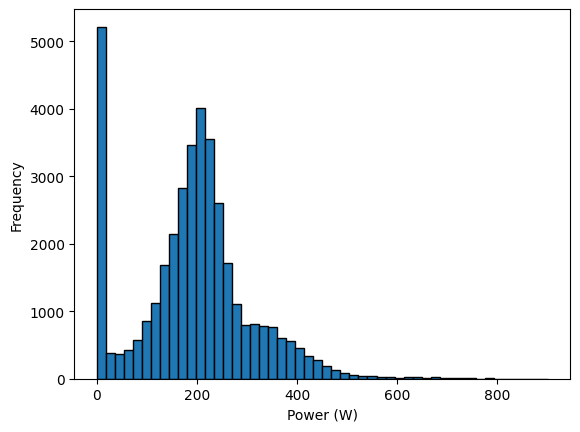

In [6]:
import matplotlib.pyplot as plt

target.plot.hist(bins=50, edgecolor="black")
plt.xlabel("Power (W)")

We see a pick at 0 Watts, it corresponds to whenever our cyclist does not
pedals (descent, stopped). In average, this cyclist delivers a power around
~200 Watts. We also see a long tail from ~300 Watts to ~400 Watts. You can
think that this range of data correspond to effort a cyclist will train to
reproduce to be able to breakout in the final kilometers of a cycling race.
However, this is costly for the human body and no one can cruise with this
power output.

Now, let's have a look at the data.

In [7]:
data.head()

,heart-rate,cadence,speed,acceleration,slope
,,,,,
2020-08-18 14:43:19,102.0,64.0,4.325,0.0880,-0.033870
2020-08-18 14:43:20,103.0,64.0,4.336,0.0842,-0.033571
2020-08-18 14:43:21,105.0,66.0,4.409,0.0234,-0.033223
2020-08-18 14:43:22,106.0,66.0,4.445,0.0016,-0.032908
2020-08-18 14:43:23,106.0,67.0,4.441,0.1144,0.000000


We can first have a closer look to the index of the dataframe.

In [8]:
data.index

DatetimeIndex(['2020-08-18 14:43:19', '2020-08-18 14:43:20',
               '2020-08-18 14:43:21', '2020-08-18 14:43:22',
               '2020-08-18 14:43:23', '2020-08-18 14:43:24',
               '2020-08-18 14:43:25', '2020-08-18 14:43:26',
               '2020-08-18 14:43:27', '2020-08-18 14:43:28',
               ...
               '2020-09-13 14:55:52', '2020-09-13 14:55:53',
               '2020-09-13 14:55:54', '2020-09-13 14:55:55',
               '2020-09-13 14:55:56', '2020-09-13 14:55:57',
               '2020-09-13 14:55:58', '2020-09-13 14:55:59',
               '2020-09-13 14:56:00', '2020-09-13 14:56:01'],
              dtype='datetime64[ns]', name='', length=38254, freq=None)

We see that records are acquired every seconds.

In [9]:
data.index.min(), data.index.max()

(Timestamp('2020-08-18 14:43:19'), Timestamp('2020-09-13 14:56:01'))

The starting date is the August 18, 2020 and the ending date is September 13,
2020. However, it is obvious that our cyclist did not ride every seconds
between these dates. Indeed, only a couple of date should be present in the
dataframe, corresponding to the number of cycling rides.

In [10]:
data.index.normalize().nunique()

4

Indeed, we have only four different dates corresponding to four rides. Let's
extract only the first ride of August 18, 2020.

In [11]:
date_first_ride = "2020-08-18"
cycling_ride = cycling.loc[date_first_ride]
data_ride, target_ride = data.loc[date_first_ride], target.loc[date_first_ride]

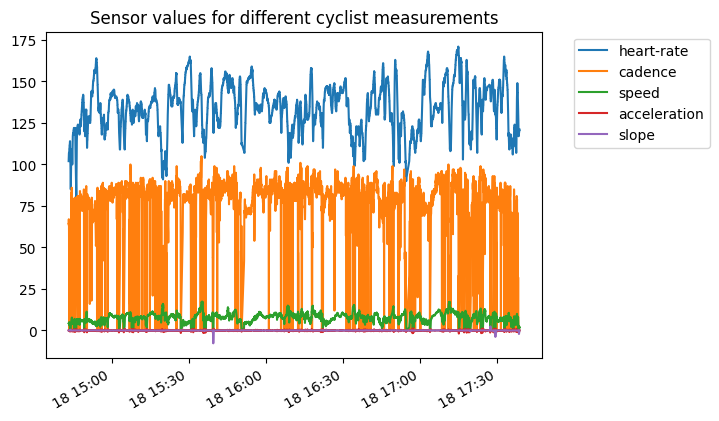

In [12]:
data_ride.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Sensor values for different cyclist measurements")

Since the unit and range of each measurement (feature) is different, it is
rather difficult to interpret the plot. Also, the high temporal resolution
make it difficult to make any observation. We could resample the data to get a
smoother visualization.

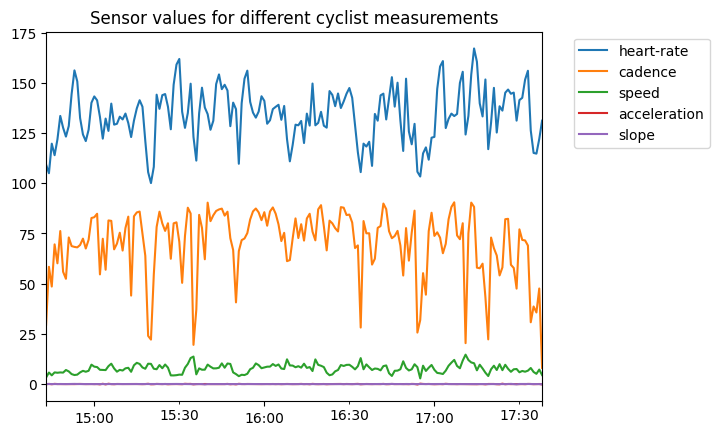

In [13]:
data_ride.resample("60S").mean().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Sensor values for different cyclist measurements")

We can check the range of the different features:

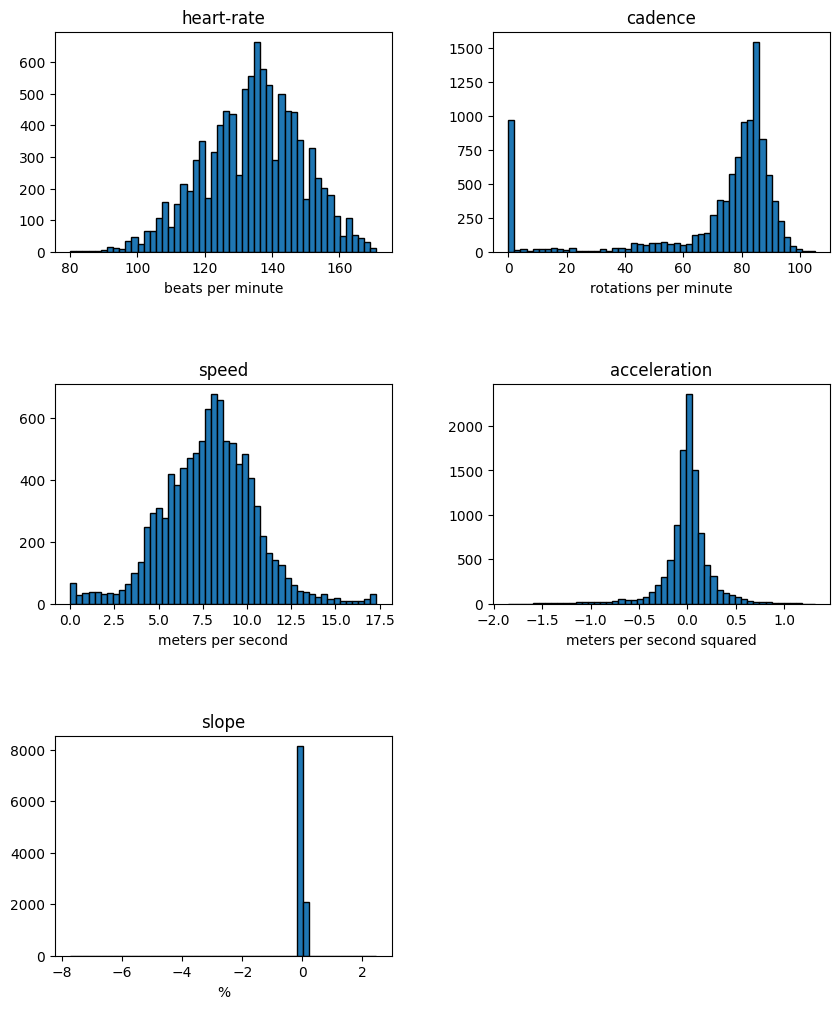

In [14]:
axs = data_ride.hist(figsize=(10, 12), bins=50, edgecolor="black", grid=False)
# add the units to the plots
units = [
    "beats per minute",
    "rotations per minute",
    "meters per second",
    "meters per second squared",
    "%",
]
for unit, ax in zip(units, axs.ravel()):
    ax.set_xlabel(unit)
plt.subplots_adjust(hspace=0.6)

From these plots, we can see some interesting information: a cyclist is
spending some time without pedaling. This samples should be associated with a
null power. We also see that the slope have large extremum.

Let's make a pair plot on a subset of data samples to see if we can confirm
some of these intuitions.

In [15]:
import numpy as np

rng = np.random.RandomState(0)
indices = rng.choice(np.arange(cycling_ride.shape[0]), size=500, replace=False)

In [16]:
subset = cycling_ride.iloc[indices].copy()
# Quantize the target and keep the midpoint for each interval
subset["power"] = pd.qcut(subset["power"], 6, retbins=False)
subset["power"] = subset["power"].apply(lambda x: x.mid)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


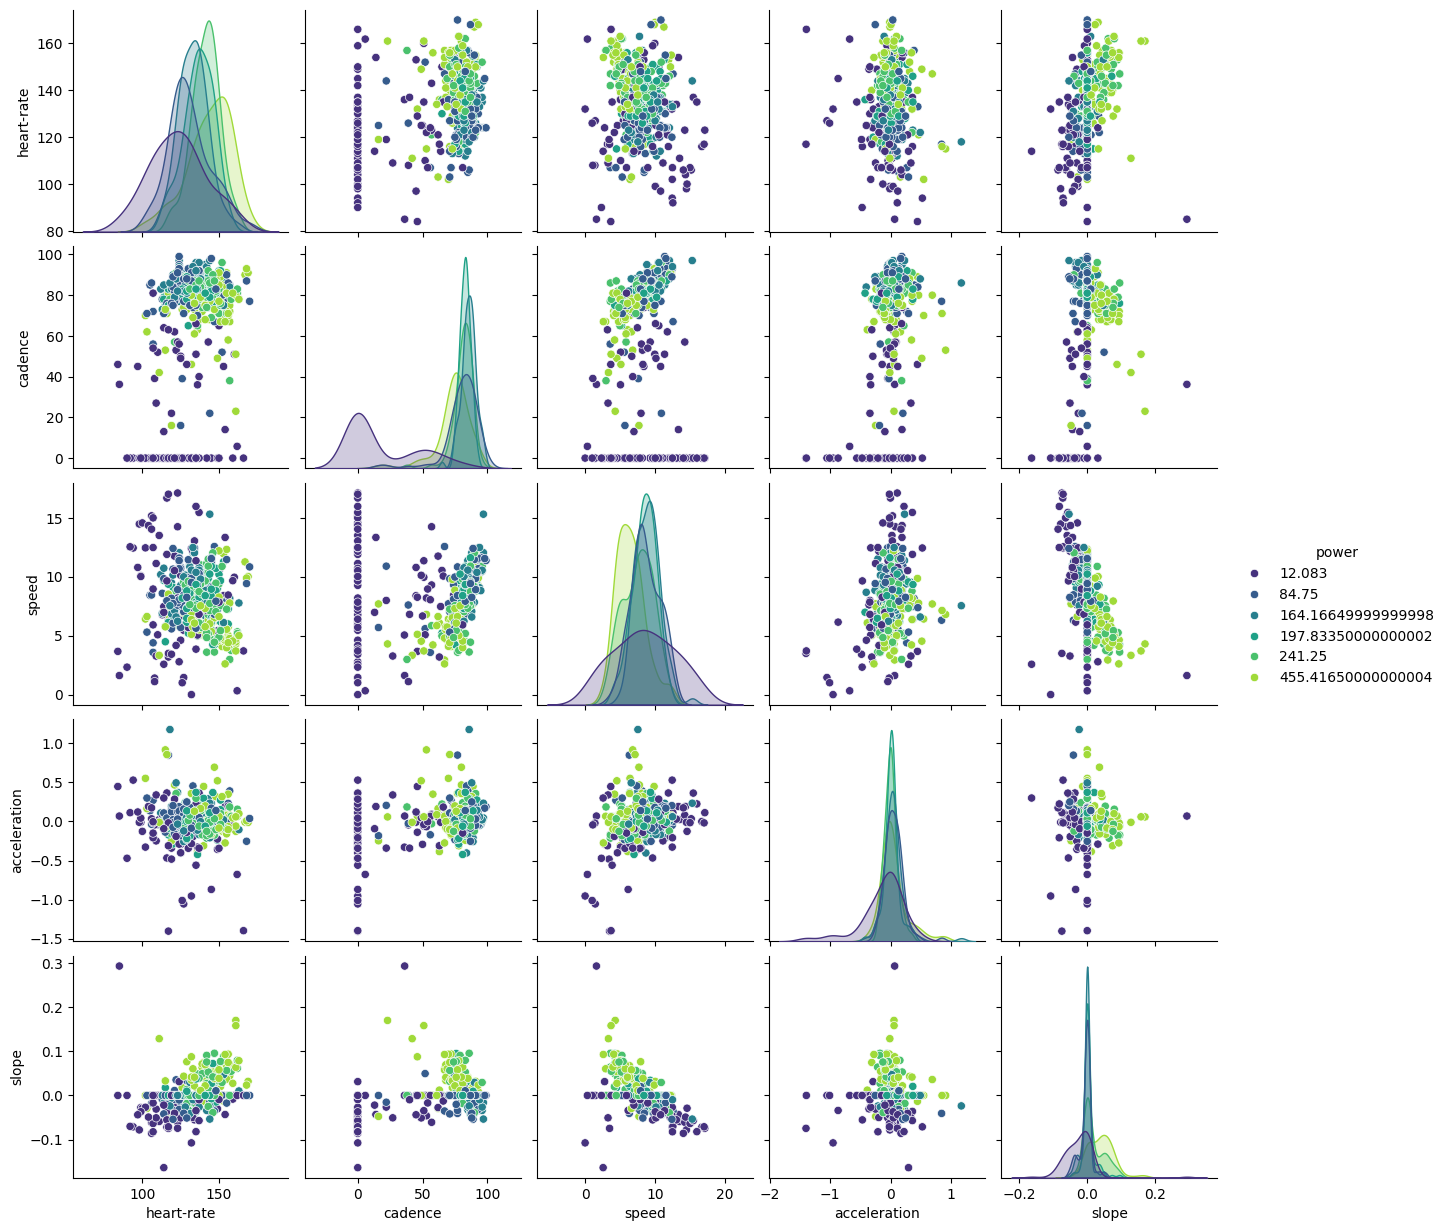

In [17]:
import seaborn as sns

_ = sns.pairplot(data=subset, hue="power", palette="viridis")

Indeed, we see that low cadence is associated with low power. We can also the
a link between higher slope / high heart-rate and higher power: a cyclist need
to develop more energy to go uphill enforcing a stronger physiological stimuli
on the body. We can confirm this intuition by looking at the interaction
between the slope and the speed: a lower speed with a higher slope is usually
associated with higher power.